# LBM for poisson equation

[__A novel lattice Boltzmann model for the Poisson equation, Chai. Z, Shi. B__
](https://www.sciencedirect.com/science/article/pii/S0307904X07001722)


For a given poisson equation
$$
    \Delta u = R(u)
$$

lattice boltzmann method can be used to solve by the following equation

$$
    f_i(x + cdt, t + dt) = f_i(x, t) - \omega (f_i(x, t) - f^{(eq)}_i(x, t)) + \Delta t R \bar\omega_i D
$$

here $R$ is the RHS of poisson eqn, $D = \alpha c^2(0.5 - \tau) \Delta t$, $c = \frac{\Delta x}{\Delta t}$, $f^{(eq)}$ is the equilibrium distribution function given by


$$
f^{(eq)}_i (x, t) = 
\begin{align*}
                            (\omega_0 - 1.0) u(x, t) , &\text{i} = 0, \\
                            \omega_i u(x, t),   &\text{i} >0
\end{align*}
$$

the weight coefficients are constrained by the following equations

$$
\sum _{i=0}^q \omega_i = 1 \\
\sum _{i=0}^q \omega_i c_i = 0 \\
\sum _{i=0}^q \omega_i c_i c_i= \alpha c^2 I \\
\sum _{i=0}^q \bar\omega_i = 1 \\
$$

using chapman-enskog expansion of the lb equation we can obtain the poisson equation with second order accurate w.r.t $\Delta x$


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from poisson import lbm, lbm2d
import time

In [17]:
%matplotlib inline

In [109]:
def main1d(nx=100, iters=1000):
    dx = 1.0/nx
    grid = np.arange(0, 1+dx, dx)
    u_exact, u_lbm = lbm(nx, iters)

    plt.figure(figsize=(8, 8))
    plt.axes(aspect='equal')
    plt.plot(grid, u_exact, label='analytical')
    plt.plot(grid, u_lbm, '*', label='lbm')
    plt.legend(loc='best')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

main1d()

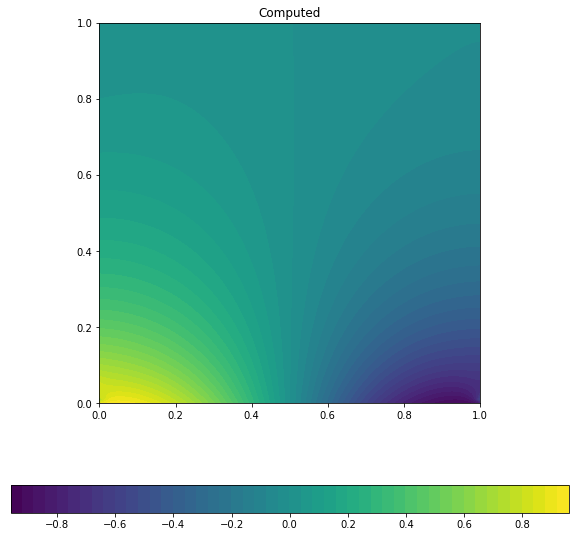

In [110]:
def main2d(nx=100, iters=10000):
    ny = nx
    x, y = np.mgrid[0:1:nx*1j, 0:1:ny*1j]
    u_exact, u_lbm = lbm2d(nx, ny, iters)

    plt.figure(figsize=(10, 10))    
    plt.axes(aspect='equal')
    plt.contourf(x, y, u_exact, 50)
    plt.title('Exact')
    plt.colorbar(orientation='horizontal')
    
    plt.figure(figsize=(10, 10))    
    plt.axes(aspect='equal')
    plt.contourf(x, y, u_lbm, 50)
    plt.title('Computed')
    plt.colorbar(orientation='horizontal')


main2d()

Text(0,0.5,'dt')

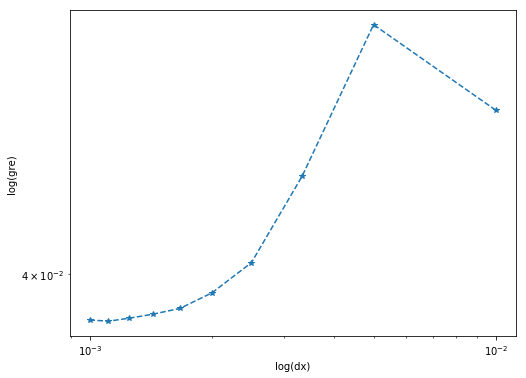

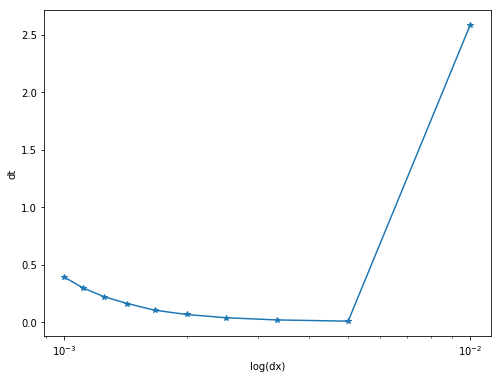

In [131]:
size = np.arange(100, 1100, 100).astype(int)

gre = []
dt = []
for i in size:
    start = time.clock()
    u_e, u_c = lbm(i, iters=100000)
    end = time.clock()
    dt.append(end-start)
    error = np.sum(abs(u_e - u_c)) / np.sum(abs(u_e))
    gre.append(error)
    
plt.figure(figsize=(8, 6))
plt.loglog(1/size, gre, '*--')
plt.xlabel('log(dx)')
plt.ylabel('log(gre)')

plt.figure(figsize=(8, 6))
plt.semilogx(1/size, dt, '*-')
plt.xlabel('log(dx)')
plt.ylabel('dt')

Text(0,0.5,'dt')

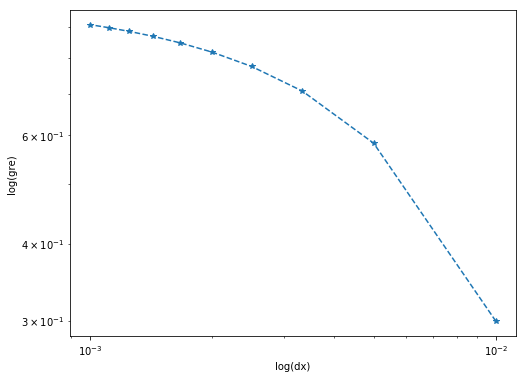

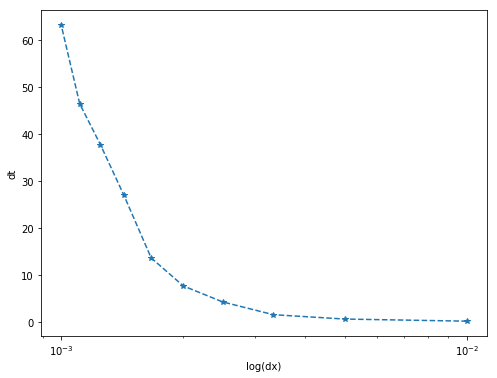

In [133]:
size = np.arange(100, 1100, 100)

gre = []
dt = []
for i in size:
    start = time.clock()
    u_e, u_c = lbm2d(i, i, iters=1000)
    end = time.clock()
    dt.append(end-start)
    error = np.sum(abs(u_e - u_c)) / np.sum(abs(u_e))
    gre.append(error)

plt.figure(figsize=(8, 6))
plt.loglog(1/size, gre, '*--')
plt.xlabel('log(dx)')
plt.ylabel('log(gre)')

plt.figure(figsize=(8, 6))
plt.semilogx(1/size, dt, '*--')
plt.xlabel('log(dx)')
plt.ylabel('dt')
    